In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

## Clustering

Now that we can measure whether two samples are similar or different, we can begin to look at clustering.  There are two main families of clustering method:
  
- Partitional Algorithms
- Hierarchical Algorithms



## Hierarchical algorithms

Organise the data into hierarchical (tree-like) structures where the most similar samples are grouped together, then similar groups are joined etc.   This might be done **bottom-up** or **top-down**.  The end result is a tree-like structure and these methods can be used when you don't know how many clusters there should be in the data.


In [3]:
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
autompg = pd.read_csv('files/auto-mpg.data', delim_whitespace=True, names=names)
# drop the name so that we just have the numerical columns
autompgN = autompg.drop('name', axis=1)
# subtract the mean, divide by the standard deviation
autompg_norm = (autompgN-autompgN.mean())/autompgN.std()
autompg_norm.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,-0.697747,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,-0.715726
1,-1.082115,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,-0.715726
2,-0.697747,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,-0.715726
3,-0.953992,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,-0.715726
4,-0.825870,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,-0.715726


## Hierarchical Clustering

KMeans is good if you know how many clusters to expect.

If you don't know how many clusters there might be, **Hierarchical Clustering** may be more useful.

- Bottom up clustering starts with individuals and groups the most similar together
- Top down clustering splits the data into two groups, then four etc

###  Agglomorative Clustering

- Bottom up (*agglomorative*) clustering is easiest to understand.  
- Use the distance metric to compute an $N x N$ *similarity matrix* containing the similarity between all pairs of items.
- Select the closest pair of items and merge them into our first cluster of two
- ...


- Next we merge the next closest.  
 - This could be another two single items or 
 - it could be one item and the just created cluster of two
- To measure the distance from the cluster we need a function that  can compare clusters 
- This continues until there is just one cluster. 

We can visualise the clustering with a **dendrogram** -- a tree-like display of the clusters as they grow.

## Distance between clusters

- How do we compare cluster similarity?
- Distance between cluster centroids
- Distance between closest/furthest members
- Average distance between pairs of cluster members
- Ward's method:
 - relative size of the summed square distances within the combined cluster
 - merge two clusters if doing so results in the smaller summed square distances

In [47]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist

# work on a copy of just a couple of variables
df = autompg_norm[['weight', 'cylinders']].copy()

# compute the distance matrix
dist = pdist(df, 'euclidean')
linkage_matrix = linkage(dist,method = 'ward')  # or 'ward'

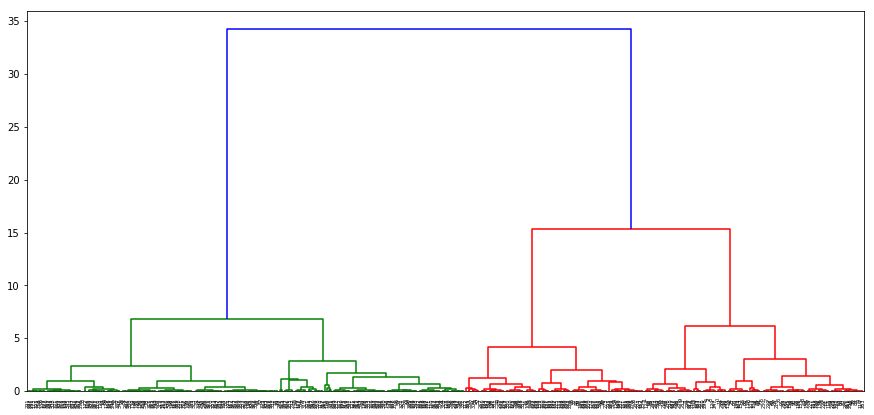

In [48]:
plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.show()

## Dendograms

- Tree display of clusters
- Hieght of lines proportional to the distance between sub-clusters
- So, shorter lines means more similar within-clusters
- To choose how many 'natural' clusters, look for change from short to long lines
- Cut the tree at a specific number of clusters or tree height

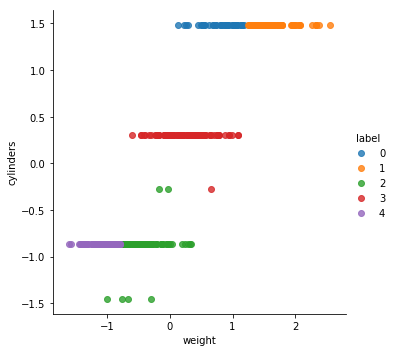

In [50]:
# get a fixed number of clusters using the cut_tree function
labels = cut_tree(linkage_matrix, n_clusters=5)
df['label'] = labels
_p = sns.lmplot("weight", "cylinders", data=df, fit_reg=False, hue='label')